In [1]:
!pip install dash-bootstrap-components
!pip install opendatasets --upgrade
!pip install jupyter_dash
!pip install webdriver-manager

# Essential Imports

In [1]:
import pandas as pd
import numpy as np
import re
import string

import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

from jupyter_dash import JupyterDash
from dash import Dash,dcc,html
from dash.dependencies import Input,Output,State
import dash_bootstrap_components as dbc

import opendatasets as od

from PIL import Image
from dash import Dash,dcc,html


import wordcloud
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
# VADER Sentiment Analyzer from NLTK
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
Download=nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fatma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Read dataset from kaggle

In [3]:
#download wordle dataset from kaggle
#username>> abdullahmohammed123
#password>> fbec8a9bc4f17fa40d35d5e7bcc869ca
od.download('https://www.kaggle.com/datasets/benhamner/wordle-tweets',force=True) 

100%|█████████████████████████████████████████████████████████████████████████████| 18.0M/18.0M [00:06<00:00, 3.14MB/s]


In [4]:
#read the csv file that contains the information about the wordle game tweets
df=pd.read_csv('wordle-tweets/tweets.csv')
df['wordle_id']=df['wordle_id'].astype('str')
df

wordle_id             tweet_id                 tweet_date  \
0            210  1482553374591660037  2022-01-16 03:20:43+00:00   
1            210  1482553387937898499  2022-01-16 03:20:46+00:00   
2            210  1482553422276698113  2022-01-16 03:20:55+00:00   
3            210  1482553436910628866  2022-01-16 03:20:58+00:00   
4            210  1482553445726908420  2022-01-16 03:21:00+00:00   
...          ...                  ...                        ...   
510690       318  1521536637716471808  2022-05-03 17:06:17+00:00   
510691       318  1521536648835911681  2022-05-03 17:06:20+00:00   
510692       318  1521536651247472641  2022-05-03 17:06:21+00:00   
510693       318  1521536651964522497  2022-05-03 17:06:21+00:00   
510694       318  1521536653826969602  2022-05-03 17:06:21+00:00   

       tweet_username                                         tweet_text  
0            bpszebes       Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩  
1          cruisecoup       Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩  
2          DestroVega       Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩  
3         brenmardash              Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩  
4         KatieHowse2              Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩  
...               ...                                                ...  
510690    bowtiebrett  Wordle 318 5/6\n\n🟨⬛⬛🟨⬛\n⬛🟩🟩⬛⬛\n🟨🟩🟩⬛🟩\n⬛🟩🟩🟩🟩\n...  
510691         KIMI5T  Wordle 318 5/6\n\n⬜🟨⬜🟨⬜\n⬜⬜⬜⬜⬜\n⬜🟨⬜⬜🟨\n⬜🟨⬜🟨⬜\n...  
510692     JenBurns70              Wordle 318 3/6\n\n⬜⬜🟨🟩⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩  
510693   StygianSiryn       Wordle 318 4/6\n\n🟩⬛⬛⬛⬛\n🟩🟩⬛⬛🟩\n🟩🟩🟨⬛🟩\n🟩🟩🟩🟩🟩  
510694    KevoMichael    Wordle 318 3/6\n\n⬛⬛🟨⬛🟨\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩\n\nTres!!  

[510695 rows x 5 columns]

# Data Preprocessing

In [5]:
#Extract date and Time from tweet_date column and create two separate columns for them
Date=[]
Time=[]
for date in df.loc[:,'tweet_date']:
    Date.append(date.split(' ')[0])
for time in df.loc[:,'tweet_date']:
    Time.append(time.split(' ')[1].split('+')[0])

df['Date']=Date
df['Time']=Time
df.drop(['tweet_date'],axis=1,inplace=True)
df.drop('tweet_username',axis=1,inplace=True)
df

wordle_id             tweet_id  \
0            210  1482553374591660037   
1            210  1482553387937898499   
2            210  1482553422276698113   
3            210  1482553436910628866   
4            210  1482553445726908420   
...          ...                  ...   
510690       318  1521536637716471808   
510691       318  1521536648835911681   
510692       318  1521536651247472641   
510693       318  1521536651964522497   
510694       318  1521536653826969602   

                                               tweet_text        Date  \
0            Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16   
1            Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩  2022-01-16   
2            Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩  2022-01-16   
3                   Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩  2022-01-16   
4                   Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16   
...                                                   ...         ...   
510690  Wordle 318 5/6\n\n🟨⬛⬛🟨⬛\n⬛🟩🟩⬛⬛\n🟨🟩🟩⬛🟩\n⬛🟩🟩🟩🟩\n...  2022-05-03   
510691  Wordle 318 5/6\n\n⬜🟨⬜🟨⬜\n⬜⬜⬜⬜⬜\n⬜🟨⬜⬜🟨\n⬜🟨⬜🟨⬜\n...  2022-05-03   
510692              Wordle 318 3/6\n\n⬜⬜🟨🟩⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩  2022-05-03   
510693       Wordle 318 4/6\n\n🟩⬛⬛⬛⬛\n🟩🟩⬛⬛🟩\n🟩🟩🟨⬛🟩\n🟩🟩🟩🟩🟩  2022-05-03   
510694    Wordle 318 3/6\n\n⬛⬛🟨⬛🟨\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩\n\nTres!!  2022-05-03   

            Time  
0       03:20:43  
1       03:20:46  
2       03:20:55  
3       03:20:58  
4       03:21:00  
...          ...  
510690  17:06:17  
510691  17:06:20  
510692  17:06:21  
510693  17:06:21  
510694  17:06:21  

[510695 rows x 5 columns]

# Get insights from various trials to reach the word !

In [6]:
#create Trials column to get number of trials each one takes to get the result
Trials=[]
for row in df['tweet_text']:
    Trials.append(row.split(' ')[2][0])
df['Trials']=Trials
df

wordle_id             tweet_id  \
0            210  1482553374591660037   
1            210  1482553387937898499   
2            210  1482553422276698113   
3            210  1482553436910628866   
4            210  1482553445726908420   
...          ...                  ...   
510690       318  1521536637716471808   
510691       318  1521536648835911681   
510692       318  1521536651247472641   
510693       318  1521536651964522497   
510694       318  1521536653826969602   

                                               tweet_text        Date  \
0            Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16   
1            Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩  2022-01-16   
2            Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩  2022-01-16   
3                   Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩  2022-01-16   
4                   Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16   
...                                                   ...         ...   
510690  Wordle 318 5/6\n\n🟨⬛⬛🟨⬛\n⬛🟩🟩⬛⬛\n🟨🟩🟩⬛🟩\n⬛🟩🟩🟩🟩\n...  2022-05-03   
510691  Wordle 318 5/6\n\n⬜🟨⬜🟨⬜\n⬜⬜⬜⬜⬜\n⬜🟨⬜⬜🟨\n⬜🟨⬜🟨⬜\n...  2022-05-03   
510692              Wordle 318 3/6\n\n⬜⬜🟨🟩⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩  2022-05-03   
510693       Wordle 318 4/6\n\n🟩⬛⬛⬛⬛\n🟩🟩⬛⬛🟩\n🟩🟩🟨⬛🟩\n🟩🟩🟩🟩🟩  2022-05-03   
510694    Wordle 318 3/6\n\n⬛⬛🟨⬛🟨\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩\n\nTres!!  2022-05-03   

            Time Trials  
0       03:20:43      4  
1       03:20:46      4  
2       03:20:55      4  
3       03:20:58      3  
4       03:21:00      3  
...          ...    ...  
510690  17:06:17      5  
510691  17:06:20      5  
510692  17:06:21      3  
510693  17:06:21      4  
510694  17:06:21      3  

[510695 rows x 6 columns]

In [7]:
FirstTrialGuesses  = df[df['Trials']=='1'].groupby(by='wordle_id')['Trials'].count()
SecondTrialGuesses = df[df['Trials']=='2'].groupby(by='wordle_id')['Trials'].count()
ThirdTrialGuesses  = df[df['Trials']=='3'].groupby(by='wordle_id')['Trials'].count()
FourthTrialGuesses = df[df['Trials']=='4'].groupby(by='wordle_id')['Trials'].count()
FifthTrialGuesses  = df[df['Trials']=='5'].groupby(by='wordle_id')['Trials'].count()
SixthTrialGuesses  = df[df['Trials']=='6'].groupby(by='wordle_id')['Trials'].count()

In [8]:
Guesses=pd.DataFrame(index=df['wordle_id'].unique())
Guesses['First_Trial']  = FirstTrialGuesses
Guesses['Second_Trial'] = SecondTrialGuesses
Guesses['Third_Trial']  = ThirdTrialGuesses
Guesses['Fourth_Trial'] = FourthTrialGuesses
Guesses['Fifth_Trial']  = FifthTrialGuesses
Guesses['Sixth_Trial']  = SixthTrialGuesses
Guesses.fillna(0,inplace=True)

In [9]:
Guesses.describe()

First_Trial  Second_Trial  Third_Trial  Fourth_Trial  Fifth_Trial  \
count        107.0    107.000000   107.000000    107.000000   107.000000   
mean           0.0    310.728972  1143.392523   1589.626168  1160.411215   
std            0.0    213.720085   614.391289    773.303225   629.446087   
min            0.0     38.000000   260.000000    630.000000   346.000000   
25%            0.0    139.500000   724.500000   1033.000000   736.500000   
50%            0.0    246.000000   977.000000   1316.000000  1034.000000   
75%            0.0    426.500000  1445.000000   2082.500000  1411.500000   
max            0.0    944.000000  3309.000000   5086.000000  4594.000000   

       Sixth_Trial  
count   107.000000  
mean    568.691589  
std     374.482798  
min      99.000000  
25%     355.500000  
50%     486.000000  
75%     695.500000  
max    2614.000000

In [10]:
PercentDF=pd.DataFrame(index=Guesses.index)
for wordle_id in Guesses.index:
    SumOfTrials=Guesses.loc[wordle_id,:].sum()
    PercentDF.loc[wordle_id,'First_Trial_%']=round(Guesses.loc[wordle_id,:]['First_Trial']*100/SumOfTrials,2)
    PercentDF.loc[wordle_id,'Second_Trial_%']=round(Guesses.loc[wordle_id,:]['Second_Trial']*100/SumOfTrials,2)
    PercentDF.loc[wordle_id,'Third_Trial_%']=round(Guesses.loc[wordle_id,:]['Third_Trial']*100/SumOfTrials,2)
    PercentDF.loc[wordle_id,'Fourth_Trial_%']=round(Guesses.loc[wordle_id,:]['Fourth_Trial']*100/SumOfTrials,2)
    PercentDF.loc[wordle_id,'Fifth_Trial_%']=round(Guesses.loc[wordle_id,:]['Fifth_Trial']*100/SumOfTrials,2)
    PercentDF.loc[wordle_id,'Sixth_Trial_%']=round(Guesses.loc[wordle_id,:]['Sixth_Trial']*100/SumOfTrials,2)
PercentDF=PercentDF.T
PercentDF

210    211    212    213    214    215    216    217    218  \
First_Trial_%    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
Second_Trial_%   7.83   6.77   7.96   2.41  14.17   8.36   7.55   3.45   4.89   
Third_Trial_%   31.62  31.20  32.81  12.27  37.44  29.80  31.97  19.12  28.99   
Fourth_Trial_%  37.50  35.11  34.18  29.73  30.45  34.56  34.04  34.83  39.77   
Fifth_Trial_%   17.24  19.49  17.22  32.89  13.43  19.67  19.64  28.48  20.98   
Sixth_Trial_%    5.82   7.43   7.84  22.70   4.51   7.61   6.80  14.12   5.37   

                  219  ...    309    310    311    312    313    314    315  \
First_Trial_%    0.00  ...   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
Second_Trial_%   1.30  ...   5.99   3.02  12.83   6.50   3.49  19.90   2.95   
Third_Trial_%   11.71  ...  25.01  13.67  32.60  27.97  13.73  35.70  11.35   
Fourth_Trial_%  31.64  ...  35.98  31.25  32.71  36.20  28.75  26.71  28.78   
Fifth_Trial_%   35.46  ...  23.29  33.16  15.46  21.74  33.69  13.67  34.57   
Sixth_Trial_%   19.90  ...   9.73  18.90   6.40   7.59  20.35   4.03  22.34   

                  316    317    318  
First_Trial_%    0.00   0.00   0.00  
Second_Trial_%   1.57  11.62   8.04  
Third_Trial_%    9.17  24.75  26.36  
Fourth_Trial_%  26.48  29.02  33.46  
Fifth_Trial_%   38.66  23.07  23.82  
Sixth_Trial_%   24.11  11.54   8.32  

[6 rows x 107 columns]

# Get insights from Number of tweets versus Time of tweet

In [11]:
#create new DataFrame to get number of tweets per day
DayCountDF=pd.DataFrame(columns=['Day','Count'])
Count=[]
Day=[]
Month=[]
Year=[]
for x in df['Date'].unique():
    Count.append(df['Date'].value_counts()[x])
    Year.append(x.split('-')[0])
    Day.append(x.split('-')[2])
    Month.append(x.split('-')[1])
DayCountDF['Day']=Day
DayCountDF['Year']=Year
DayCountDF['MonthN']=Month
DayCountDF['Count']=Count
DayCountDF['Day']=DayCountDF['Day'].astype('int')
DayCountDF['MonthN']=DayCountDF['MonthN'].astype('int')
DayCountDF.sort_values(by='Day',inplace=True)
MonthsDict={1:'January',
            2:'February',
            3:'March',
            4:'April',
            5:'May',
            6:'June',
            7:'July',
            8:'August',
            9:'September',
            10:'October',
            11:'November',
            12:'December'}
DayCountDF['Month']=DayCountDF['MonthN'].replace(MonthsDict)
DayCountDF

Day  Count  Year  MonthN     Month
43     1   3603  2022       3     March
103    1   2202  2022       5       May
16     1   6465  2022       2  February
74     1   3267  2022       4     April
17     2   6621  2022       2  February
..   ...    ...   ...     ...       ...
14    30   7017  2022       1   January
72    30   3211  2022       3     March
102   30   4787  2022       4     April
15    31   6402  2022       1   January
73    31   3287  2022       3     March

[106 rows x 5 columns]

In [12]:
t=[]
k=[]
for i in range(0,24):
    t.append(0)
    k.append(i)
for x in df['Time']:
    s=int(x.split(':')[0])
    t[s]=t[s]+1 
TweetHourDF=pd.DataFrame(list(zip(k,t)),columns=['Hour','NumberOfTweets'])
TweetHourDF['Hour']=TweetHourDF['Hour'].astype('str')
TweetHourDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hour            24 non-null     object
 1   NumberOfTweets  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [13]:
TweetHourDF

Hour  NumberOfTweets
0     0           27101
1     1           52389
2     2           80090
3     3           66268
4     4           30741
5     5            8456
6     6            3703
7     7            5721
8     8             398
9     9             153
10   10             111
11   11              99
12   12            3542
13   13           12659
14   14           51100
15   15           30196
16   16           20180
17   17           17141
18   18           22289
19   19           13388
20   20            9649
21   21            8255
22   22           22350
23   23           24716

# Scrap solutions of wordle game 

In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.firefox import GeckoDriverManager

driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())
driver.get('https://screenrant.com/wordle-answers-updated-word-puzzle-guide/')  



====== WebDriver manager ======
Current firefox version is 99.0
Get LATEST geckodriver version for 99.0 firefox
Driver [C:\Users\Fatma\.wdm\drivers\geckodriver\win64\v0.31.0\geckodriver.exe] found in cache
C:\Users\Fatma\AppData\Local\Temp/ipykernel_12324/3928175265.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())


In [15]:
x=driver.find_elements(By.XPATH,'//li')
Dict={}
ids=[]
Words=[]
for t in x[38:157]:
    ids.append(int(t.text.split('-')[1].replace('#','')))
    Words.append(t.text.split('-')[2])
Dict['Id']=ids
Dict['Word']=Words

In [16]:
Dict['Id']=ids
Dict['Word']=Words

In [17]:
df_words=pd.DataFrame()
df_words=df_words.from_dict(Dict)

In [18]:
df_words=df_words.sort_values(by='Id',ascending=True)
df_words=df_words.set_index(['Id'])
indexes=list(df_words[df_words.index<210].index)
indexes.append(df_words.index[-1])
df_words.drop(axis=0,index=indexes,inplace=True)

In [19]:
df_words=df_words.reset_index()

In [20]:
df_words

Id     Word
0    210    PANIC
1    211    SOLAR
2    212    SHIRE
3    213    PROXY
4    214    POINT
..   ...      ...
99   313    ZESTY
100  314    TRASH
101  315    LARVA
102  316    FORGO
103  317    STORY

[104 rows x 2 columns]

# Merge solutions with datasets

In [21]:
df2=df
df2['wordle_id']=df2['wordle_id'].astype(str).astype(int)
df_merged = pd.merge(df2, df_words, how='left', left_on='wordle_id', right_on='Id')

In [22]:
df_merged.drop('Id',axis=1,inplace=True)

In [23]:
df_merged.dropna(inplace=True)

In [24]:
df_merged['wordle_id']=df_merged['wordle_id'].astype(str)

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471344 entries, 0 to 507063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   wordle_id   471344 non-null  object
 1   tweet_id    471344 non-null  int64 
 2   tweet_text  471344 non-null  object
 3   Date        471344 non-null  object
 4   Time        471344 non-null  object
 5   Trials      471344 non-null  object
 6   Word        471344 non-null  object
dtypes: int64(1), object(6)
memory usage: 28.8+ MB


# Get insights from games Words

# Most Frequent Letters in the wordle words 

In [26]:
words_df=pd.read_csv('5_letters.csv')
freq_letters=words_df.apply(pd.Series.value_counts)

In [27]:
freq_letters['Total']=freq_letters.sum(axis=1)

In [28]:
freq_letters=freq_letters.fillna(0)
freq_letters

1    2      3    4      5   Total
a  243.0  368  298.0  140   66.0  1115.0
b  384.0   19   51.0   43    8.0   505.0
c  410.0   31   77.0  125   22.0   665.0
d  269.0   29   79.0   95  188.0   660.0
e  116.0  272  191.0  510  327.0  1416.0
f  184.0    7   19.0   36   18.0   264.0
g   56.0   14   73.0   74   24.0   241.0
h   46.0  133   13.0   33   90.0   315.0
i   15.0  261  257.0  127   15.0   675.0
j   10.0    3    4.0    3    0.0    20.0
k   12.0    5   38.0   91   71.0   217.0
l   61.0  202  154.0  171  109.0   697.0
m   61.0   36   71.0   84   27.0   279.0
n   30.0   59  173.0  172  100.0   534.0
o   24.0  385  235.0  127   56.0   827.0
p   92.0   41   54.0   73   39.0   299.0
q    9.0    4    0.0    1    0.0    14.0
r   68.0  274  205.0  139  164.0   850.0
s  193.0   23  101.0  120  729.0  1166.0
t  104.0   55  129.0  178  197.0   663.0
u   17.0  188  129.0   58    4.0   396.0
v   28.0   13   62.0   31    0.0   134.0
w   57.0   26   31.0   35   14.0   163.0
x    0.0   26   19.0    2   10.0    57.0
y    9.0   21   19.0   15  220.0   284.0
z    1.0    4   17.0   16    1.0    39.0

In [29]:
freq_letters=freq_letters.fillna(0)
freq_letters

1    2      3    4      5   Total
a  243.0  368  298.0  140   66.0  1115.0
b  384.0   19   51.0   43    8.0   505.0
c  410.0   31   77.0  125   22.0   665.0
d  269.0   29   79.0   95  188.0   660.0
e  116.0  272  191.0  510  327.0  1416.0
f  184.0    7   19.0   36   18.0   264.0
g   56.0   14   73.0   74   24.0   241.0
h   46.0  133   13.0   33   90.0   315.0
i   15.0  261  257.0  127   15.0   675.0
j   10.0    3    4.0    3    0.0    20.0
k   12.0    5   38.0   91   71.0   217.0
l   61.0  202  154.0  171  109.0   697.0
m   61.0   36   71.0   84   27.0   279.0
n   30.0   59  173.0  172  100.0   534.0
o   24.0  385  235.0  127   56.0   827.0
p   92.0   41   54.0   73   39.0   299.0
q    9.0    4    0.0    1    0.0    14.0
r   68.0  274  205.0  139  164.0   850.0
s  193.0   23  101.0  120  729.0  1166.0
t  104.0   55  129.0  178  197.0   663.0
u   17.0  188  129.0   58    4.0   396.0
v   28.0   13   62.0   31    0.0   134.0
w   57.0   26   31.0   35   14.0   163.0
x    0.0   26   19.0    2   10.0    57.0
y    9.0   21   19.0   15  220.0   284.0
z    1.0    4   17.0   16    1.0    39.0

In [30]:
freq_letters.rename(columns = {'1':'1st', '2':'2nd','3':'3rd','4':'4th','5':'5th'}, inplace = True)

In [31]:
freq_letters=freq_letters.reset_index()
freq_letters.rename(columns={'index':'Letters'},inplace=True)

In [32]:
data=freq_letters[['Letters','Total']]
data.head()

Letters   Total
0       a  1115.0
1       b   505.0
2       c   665.0
3       d   660.0
4       e  1416.0

In [33]:
data=data.sort_values(by="Total",ascending=True)

# Sentiment Analysis of tweets

In [34]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('&amp', '', text)
    text = re.sub('rt @\D\w*:', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [35]:
df['message_clean'] = df['tweet_text'].apply(clean_text)

In [36]:
df.head()

wordle_id             tweet_id  \
0        210  1482553374591660037   
1        210  1482553387937898499   
2        210  1482553422276698113   
3        210  1482553436910628866   
4        210  1482553445726908420   

                                     tweet_text        Date      Time Trials  \
0  Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16  03:20:43      4   
1  Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩  2022-01-16  03:20:46      4   
2  Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩  2022-01-16  03:20:55      4   
3         Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩  2022-01-16  03:20:58      3   
4         Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16  03:21:00      3   

                  message_clean  
0  wordle  ⬛⬛🟨🟨⬛🟩⬛⬛⬛⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩  
1  wordle  ⬜⬜⬜⬜⬜🟩🟩🟨🟨⬜🟩🟩⬜🟩🟨🟩🟩🟩🟩🟩  
2  wordle  ⬜⬜⬜🟨⬜⬜🟩⬜🟨⬜⬜🟩⬜🟨⬜🟩🟩🟩🟩🟩  
3       wordle  ⬜⬜🟨⬜⬜🟨🟨⬜⬜⬜🟩🟩🟩🟩🟩  
4       wordle  ⬛⬛🟨⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩

In [37]:
vader_analyzer = SentimentIntensityAnalyzer()

In [38]:
def sentiment_scores(message_clean):
    score = vader_analyzer.polarity_scores(message_clean)
    return score

In [39]:
df['polarity_scores'] = df.tweet_text.apply(sentiment_scores)
df['vader_compound']  = df.polarity_scores.apply(lambda x: x['compound'])
df['vader_neg']       = df.polarity_scores.apply(lambda x: x['neg'])
df['vader_neu']       = df.polarity_scores.apply(lambda x: x['neu'])
df['vader_pos']       = df.polarity_scores.apply(lambda x: x['pos'])

In [40]:
df[df['vader_compound'] == 0]['message_clean']

0              wordle  ⬛⬛🟨🟨⬛🟩⬛⬛⬛⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩
1              wordle  ⬜⬜⬜⬜⬜🟩🟩🟨🟨⬜🟩🟩⬜🟩🟨🟩🟩🟩🟩🟩
2              wordle  ⬜⬜⬜🟨⬜⬜🟩⬜🟨⬜⬜🟩⬜🟨⬜🟩🟩🟩🟩🟩
3                   wordle  ⬜⬜🟨⬜⬜🟨🟨⬜⬜⬜🟩🟩🟩🟩🟩
4                   wordle  ⬛⬛🟨⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩
                        ...                
510690    wordle  🟨⬛⬛🟨⬛⬛🟩🟩⬛⬛🟨🟩🟩⬛🟩⬛🟩🟩🟩🟩🟩🟩🟩🟩🟩
510691    wordle  ⬜🟨⬜🟨⬜⬜⬜⬜⬜⬜⬜🟨⬜⬜🟨⬜🟨⬜🟨⬜🟩🟩🟩🟩🟩
510692              wordle  ⬜⬜🟨🟩⬜⬜🟩🟩🟩🟩🟩🟩🟩🟩🟩
510693         wordle  🟩⬛⬛⬛⬛🟩🟩⬛⬛🟩🟩🟩🟨⬛🟩🟩🟩🟩🟩🟩
510694          wordle  ⬛⬛🟨⬛🟨🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩tres
Name: message_clean, Length: 456783, dtype: object

In [41]:
conditions = [
    (df['vader_compound'] == 0),
    (df['vader_compound'] > 0),
    (df['vader_compound'] < 0)
]
choices = ['neutral','positive','negative']

df['vader_compound1'] = np.select(conditions, choices)

In [42]:
df.head()

wordle_id             tweet_id  \
0        210  1482553374591660037   
1        210  1482553387937898499   
2        210  1482553422276698113   
3        210  1482553436910628866   
4        210  1482553445726908420   

                                     tweet_text        Date      Time Trials  \
0  Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16  03:20:43      4   
1  Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩  2022-01-16  03:20:46      4   
2  Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩  2022-01-16  03:20:55      4   
3         Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩  2022-01-16  03:20:58      3   
4         Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩  2022-01-16  03:21:00      3   

                  message_clean  \
0  wordle  ⬛⬛🟨🟨⬛🟩⬛⬛⬛⬛🟩🟩🟨⬛⬛🟩🟩🟩🟩🟩   
1  wordle  ⬜⬜⬜⬜⬜🟩🟩🟨🟨⬜🟩🟩⬜🟩🟨🟩🟩🟩🟩🟩   
2  wordle  ⬜⬜⬜🟨⬜⬜🟩⬜🟨⬜⬜🟩⬜🟨⬜🟩🟩🟩🟩🟩   
3       wordle  ⬜⬜🟨⬜⬜🟨🟨⬜⬜⬜🟩🟩🟩🟩🟩   
4       wordle  ⬛⬛🟨⬛⬛🟩🟩🟩⬛⬛🟩🟩🟩🟩🟩   

                                     polarity_scores  vader_compound  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0.0   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0.0   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0.0   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0.0   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...             0.0   

   vader_neg  vader_neu  vader_pos vader_compound1  
0        0.0        1.0        0.0         neutral  
1        0.0        1.0        0.0         neutral  
2        0.0        1.0        0.0         neutral  
3        0.0        1.0        0.0         neutral  
4        0.0        1.0        0.0         neutral

In [43]:
tweet7 = pd.DataFrame(df, columns = ['tweet_text','vader_compound1'])
tweet7=tweet7.groupby(['vader_compound1']).count()
tweet7 = tweet7.reset_index(inplace=False)

In [44]:
tweet7.head()

vader_compound1  tweet_text
0        negative       24018
1         neutral      456783
2        positive       29894

In [45]:
tweet7.rename(columns = {'tweet_text':'Tweet Count'}, inplace = True)
tweet7.rename(columns={'vader_compound1':'Text Category'},inplace=True)

# Word Cloud for Tweets

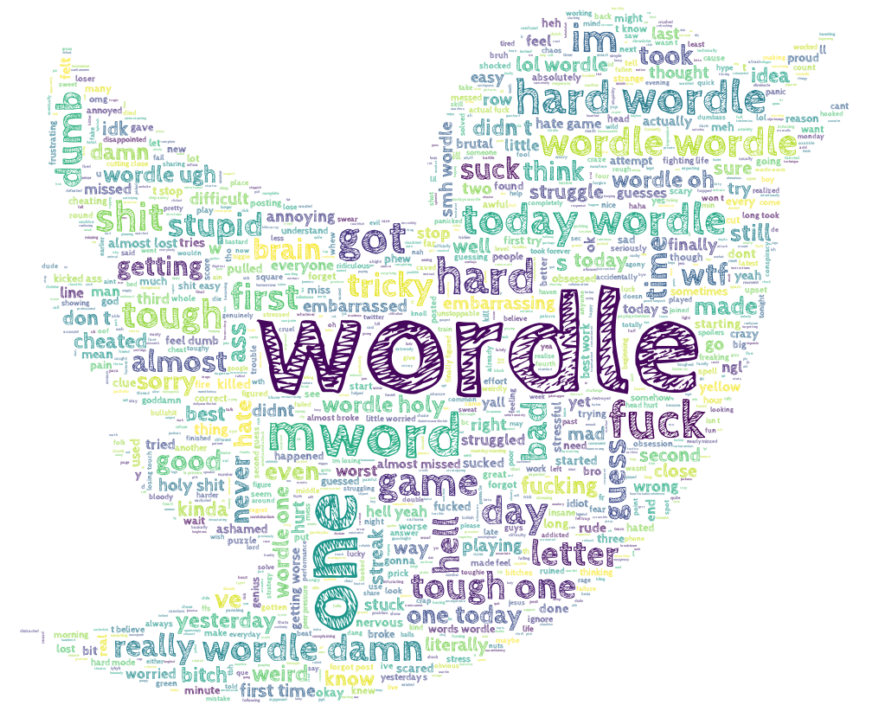

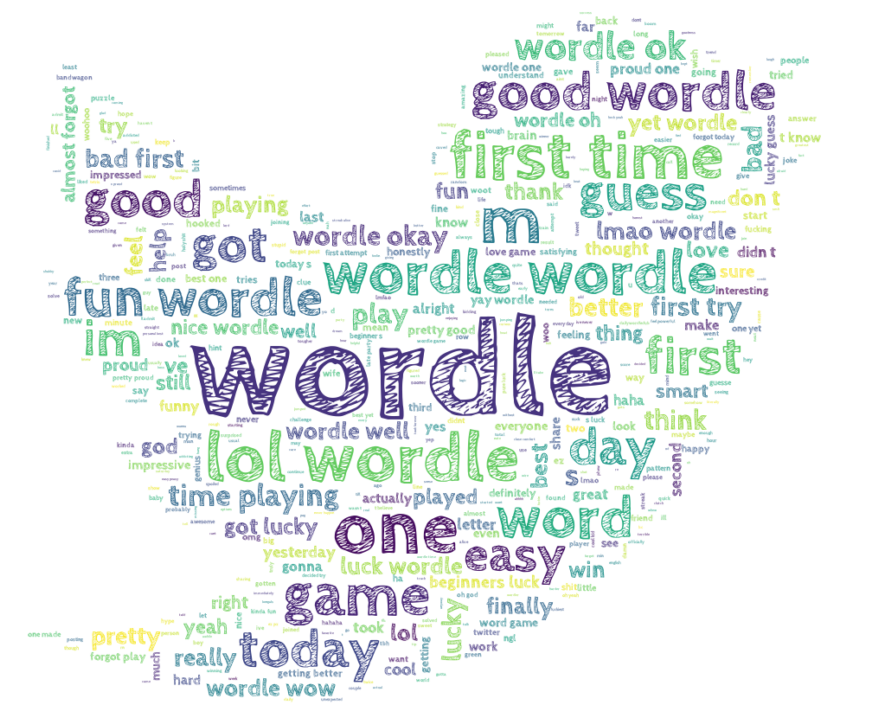

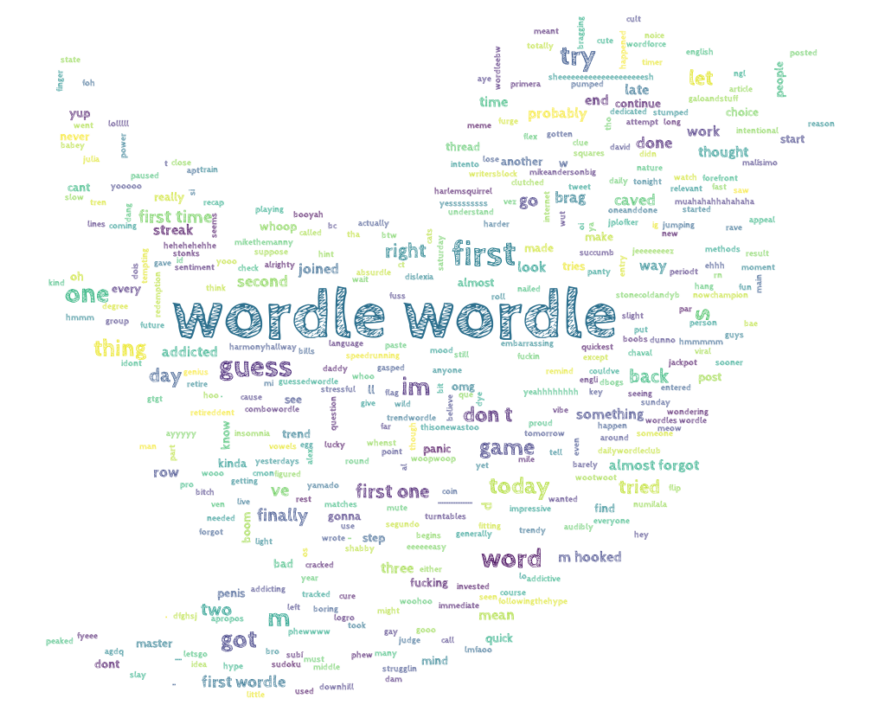

In [46]:
twitter_mask =  np.array(Image.open('assets/twitter_mask.png'))
def flatten_list(l):
    return [x for y in l for x in y]
# color coding our wordclouds 
def Gray_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return (82, 82, 82)
def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return (107, 169, 104)
def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return (185,176,106)
def white_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return (255, 255, 255)
#twitter_mask = np.array(Image.open(r'assets/twitter_mask.png'))
def generate_word_clouds(text,color,background,tweet):
    # Display the generated image:
    fig, axes = plt.subplots(figsize=(20,10))    
    wordcloud_neg = WordCloud(font_path='font/CabinSketch-Bold.ttf',
                              width=2000, height=1800,max_words=2000,
                              mask=twitter_mask,
                              background_color='white').generate(" ".join(text))
    axes.imshow(wordcloud_neg, interpolation='bilinear')
    axes.axis("off")
    plt.tight_layout()
    img=plt.savefig(str(tweet)+'.png')  
    plt.show();
    return Image.open(str(tweet)+'.png')
    
sentiment_sorted= df.sort_values('tweet_id', ascending=False)
positive_top_2000 = df[df['vader_compound1'] == "positive"].iloc[:2000]
negative_top_2000 = df[df['vader_compound1'] == "negative"].iloc[:2000]
neutral_top_2000 = df[df['vader_compound1'] == "neutral"].iloc[:2000]

cleanup = lambda x: [y for y in x.split() if y not in stopwords.words('english')]
neg_doc = flatten_list(negative_top_2000['message_clean'].apply(cleanup))
pos_doc = flatten_list(positive_top_2000['message_clean'].apply(cleanup))
neu_doc = flatten_list(neutral_top_2000['message_clean'].apply(cleanup))

figNeg=generate_word_clouds(neg_doc,white_color_func,"#7a7d80",'Neg')
figPos=generate_word_clouds(pos_doc,white_color_func,"#5c9a52",'Pos')
figNeu=generate_word_clouds(neu_doc,white_color_func,"#cbb764",'Neu')

In [47]:
fig2=px.pie(tweet7,
            values='Tweet Count',
            names='Text Category',
            color='Text Category',
            color_discrete_map={
                'neutral':'#5c9a52',
                'positive':'#cbb764',
                'negative':'#7a7d80'})
fig2.update_layout(
            width = 1300,
            height = 600,
    font_family="Arial",
    font_size=18,
    legend_font_size=24,
    legend_font_family="Arial",
    legend_borderwidth=5
        )

# Dashboard Code

In [48]:
import datetime
MonthsList=list(DayCountDF['Month'].unique())
MonthsList.append('AllMonths')
TodayDate= str(datetime.date.today()).split('-')
DisplayTodayDate=TodayDate[2]+'/'+TodayDate[1]+'/'+TodayDate[0]
TopDay=DayCountDF[DayCountDF['Count']==DayCountDF['Count'].max()]

In [49]:
ProjectGraphs=[
    #bar plot for relation between each wordle word and number of tweets
    px.bar(x=df['wordle_id'].unique(),y=list(df.groupby('wordle_id')['tweet_id'].count()),labels = {'x':'wordle_id','y':'Number of tweets'},template='gridon'), 
    #bar polar plot for relation between time of the day and number of tweets 
    px.bar_polar(TweetHourDF, r="NumberOfTweets", theta="Hour",
                   color="NumberOfTweets",
                   color_continuous_scale= px.colors.sequential.YlGn_r,title="Hour of the day vs Number of tweets"),
    #line plot for relation between Days of the game and number of tweets each day
    px.line(DayCountDF,'Day','Count',color='Month',markers=True,title="Day vs Number of Tweets")
]

# Style

In [50]:
# The styles for SiderBar.
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "18rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}
DivStyle={
  'border-radius': '5px',
  'background-color': 'white',
  'margin-left': '50px',
  'margin-right':'50px',
  'margin-top': '25px',
  'height':'auto',
  'padding': '25px',
  'position': 'relative',
  'box-shadow': '2px 2px 2px lightgray'
}
# The styles for the main content position it to the right of the sidebar and add some padding.
CONTENT_STYLE = {
    "background-color": "#f8f9fa",
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

# Slidebar

In [52]:
app = JupyterDash(external_stylesheets=[dbc.themes.BOOTSTRAP])
sidebar = html.Div(
    [
        html.Img(src=app.get_asset_url('NoBack.gif'),style={'width':'240px','height':'240px'}),
        #html.Img(src="https://images.wsj.net/im-464959",style={'width':'225px','height':'225px'}),
        html.H2("Wordle Game",style={"text-align": 'center'}),
        html.Hr(),
        html.P(
            "Wordle is a simple word game that gives players six attempts to guess a five-letter word each day. There is a new word every day, and the word is the same for everybody.", className="lead"
        ),
        html.Br(),
        dbc.Nav(
            [
                dbc.NavLink("Analysis", href="/", active="exact",style={'background-color':  '#cbb764','color': '#FFFFFF', 'fontSize': 22,"text-align": 'center','margin-bottom': '15px'}),
                dbc.NavLink("Tweets", href="/page-1", active="exact",style={'background-color':'#7a7d80','color': '#FFFFFF', 'fontSize': 22,"text-align": 'center','margin-bottom': '15px'}),
                dbc.NavLink("Play",href='/page-2', active="exact",style={'background-color':  '#5c9a52','color': '#FFFFFF', 'fontSize': 22,"text-align": 'center','margin-bottom': '15px'}),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

In [53]:
content = html.Div(id="page-content", style=CONTENT_STYLE)
app.layout = html.Div([dcc.Location(id="url"), sidebar, content])

# Bans 

In [54]:
card_content1 = [
    dbc.CardHeader(
        [
          html.P("Date: "+DisplayTodayDate,
                 style={'text-align': 'center','fontSize':'140%','fontFamily':'Arial','fontWeight': 'bold',
                        'vertical-align':'middle'}),
          html.P("Wordle ID: "+str(int(df['wordle_id'].unique()[-1])+2),style={'text-align': 'center','fontSize':'140%','fontFamily':'Arial','fontWeight': 'bold','vertical-align':'middle'})],),

        ]
card_content2 = [
    dbc.CardHeader(
        [
                        html.P("Top Day",style={'text-align': 'center','vertical-align':'middle','fontSize':'140%','fontFamily':'Arial','fontWeight': 'bold'}),
                        html.P(str(list(TopDay['Day'])[0])+" "+str(list(TopDay['Month'])[0])+" "+str(list(TopDay['Year'])[0]),style={'text-align': 'center','fontSize':'140%','fontWeight': 'bold','fontFamily':'Arial','vertical-align':'middle'})],),
        ]

card_content3 = [
    dbc.CardHeader(
        [
                        html.P("Top Hour",style={'text-align': 'center','vertical-align':'middle','fontSize':'140%','fontFamily':'Arial','fontWeight': 'bold'}),
                        html.P(TweetHourDF[TweetHourDF['NumberOfTweets']==TweetHourDF['NumberOfTweets'].max()]['Hour']+":00",style={'text-align': 'center','fontSize':'140%','fontWeight': 'bold','fontFamily':'Arial','vertical-align':'middle'}),
        ]
    )]


# Tweets Analysis Page

In [55]:

Content_page2=html.Div([
                    html.H1("Daily Wordle Tweets Analysis",style={'text-align':'center'}),
html.Br(),
                    dbc.Row([
                        
                      dbc.Col([dbc.Card(card_content1, color='#cbb764', inverse=True)]),
                      dbc.Col([dbc.Card(card_content2, color='#7a7d80', inverse=True)]),
                      dbc.Col([dbc.Card(card_content3, color='#5c9a52', inverse=True)]),

                    ]),
                        html.Br(),
                        dbc.Row([
                      dbc.Col([                    
                                    dcc.Dropdown(id='DropDown',
                                    options=MonthsList,
                                    value='February',
                                    placeholder='Choose a Position ...',
                                    multi=False),

                              ]),
                                    dbc.Col([                    
                                 dcc.DatePickerSingle(id='Wordle_Date',
                                 date=datetime.date(int(df['Date'][0].split('-')[0]),int(df['Date'][0].split('-')[1]),int(df['Date'][0].split('-')[2])),
                                 style={'width':'200px','text-align':'center','margin-left':'250px'}),

                              ]),       
                        ]),
    html.Br(),                
    dbc.Row(
                     [
                        dbc.Col(
                            [ 
                             
                              dbc.Row(html.Div(dcc.Graph(id="LineChart"), style={ 'margin':'auto','background-color ':'black'}))
                            ],width=6),
#                          'width':'500px', 'height':'240',
                        
                        dbc.Col(
                            [
                                html.Div(dcc.Graph(id="BarChart"),style={'background-color ':'white'}),
                            ],width=6)
                                
                     ]),
    html.Br(),
    
                    dbc.Row(
                     [
                        dbc.Col([
                            html.Div(dcc.Graph(figure=ProjectGraphs[1]),style={'background-color ':'white'})],width=6),
                        
                        dbc.Col(
                            [                              
                              dbc.Row(dcc.Graph(id="HorizontalBar-Chart"),)
                            ],width=6),                     
                     ]),])
                     

# Tweets NLP Analysis Page

In [56]:
contant_Anlysis=html.Div([ html.Div(
                    [
                        html.H2(
                            'How can we use NLP to analyze words used in Wordle tweets ?',style={"text-align": 'center','fontFamily':'Arial','marginBottom': '1.5em'}

                        )
                    ],
                    className='eight columns'
                ),
 
                          
                dbc.Row(
                     [ html.Div([
                           dcc.RadioItems(id="RadioButton",
                                          options=['Postive', 'Negative','Neutral',],
                                          value='Postive',
                                          inline=True,
                                          )],
                            className="pretty_container"
                        ),
                        html.H4(
                            'Word cloud for Tweets',style={"text-align": 'center','fontFamily':'Arial','marginTop': '1.5em'}

                        ),
                        html.Br(),
                        html.Img(id='Wordcloud'),
                                
                     ]),
    
                    dbc.Row(
                     [
                        html.H4(
                            'Sentiment Distribution',style={"text-align": 'center','fontFamily':'Arial','marginTop': '1.5em'}

                        ),
                        dcc.Graph(figure=fig2),                    
                     ])
                          
            ],
            id="header",
            className='row',
        )

# Play Page

In [57]:
Play_page= html.Div([ html.Div(
                    [
                        html.H2(
                            'Tips and Tricks from Wordlers',style={"text-align": 'center','fontFamily':'Arial'}

                        ),
                    ],

                    className='eight columns'
                ),
                    dcc.Dropdown(id='dropdown',
                                    options=['1st','2nd','3rd','4th','5th','Total'],
                                    value=None,
                                    placeholder='Choose a Position ...',
                                    multi=True),
                    dcc.Graph(id='fig1'),
                     html.Div(
                         [
                             dbc.Button("Time to Play",href="https://www.nytimes.com/games/wordle/index.html",
                                        outline=True,
                                        target="_blank",size="lg",
                                        style={'background-color':'#cbb764',
                                                     'color': '#FFFFFF',
                                                     'border': '0px',
                                                     'hover': { 
                                                         'color': '#5c9a52'}
                                                    }),],
                         className="d-grid gap-2",)
            ],
            id="header",
            className='row',
        )

# Update Page 1 graphs

In [58]:
@app.callback(
Output("LineChart","figure"),
Input("DropDown","value")
)
def update_plot(value):
    if value!='AllMonths':
        colors = ['lightslategray',] 
        fig=px.line(DayCountDF[DayCountDF['Month']==value],'Day','Count',color='Month',color_discrete_sequence=colors,markers=True,title="Day vs Number of Tweets")
    else:
        fig=ProjectGraphs[2]
    return fig
@app.callback(
Output("HorizontalBar-Chart","figure"),
Input("Wordle_Date","date")
)
def update_plot(date):
    if date:
        colors = ['lightslategray',] 
        x_axis=PercentDF.sort_values(by=df_merged[df_merged['Date']==str(date)]['wordle_id'].unique()[-1],ascending=True)[df_merged[df_merged['Date']==str(date)]['wordle_id'].unique()[-1]]
        y_axis=x_axis.index
        figure=px.bar(x=x_axis,y=y_axis,orientation='h',color_discrete_sequence=colors,title="Percentage of trials each day")
        return figure
    
@app.callback(
Output("Wordle_Date","min_date_allowed"),
Output("Wordle_Date","max_date_allowed"),
Output("BarChart","figure"),
Input("DropDown","value"))
def update_plot(value):
    if value=='AllMonths':
        colors = ['lightslategray',]
        fig_bar=px.bar(x=df_merged['wordle_id'].unique(),y=list(df_merged.groupby('wordle_id')['tweet_id'].count()),
                       hover_name=df_merged['Word'].unique(),
                       labels = {'x':'wordle_id','y':'Number of tweets'},
                       template='gridon',title='Wordle_ID vs Number of Tweets',
                      color_discrete_sequence=colors)
        min_date_allowed=df_merged['Date'].min()
        max_date_allowed=df_merged['Date'].unique()[-2]
    else:
        colors = ['lightslategray',]
        fig_bar=px.bar(x=df_merged[df_merged['Date'].apply(lambda s: int(s.split('-')[1]))==[key for key,val in MonthsDict.items() if val==value][0]]['wordle_id'].unique(),
                       y=list(df_merged[df_merged['Date'].apply(lambda s: int(s.split('-')[1]))==[key for key,val in MonthsDict.items() if val==value][0]].groupby('wordle_id')['tweet_id'].count()),
                       hover_name=df_merged[df_merged['Date'].apply(lambda s: int(s.split('-')[1]))==[key for key,val in MonthsDict.items() if val==value][0]]['Word'].unique(),
                       labels = {'x':'wordle_id','y':'Number of tweets'},
                       title='Wordle_ID vs Number of Tweets',
                       color_discrete_sequence=colors,
                       template='gridon')

        min_date_allowed=df_merged[df_merged['Date'].apply(lambda s: int(s.split('-')[1]))==[key for key,val in MonthsDict.items() if val==value][0]]['Date'].min()
        max_date_allowed=df_merged[df_merged['Date'].apply(lambda s: int(s.split('-')[1]))==[key for key,val in MonthsDict.items() if val==value][0]]['Date'].max()
    return min_date_allowed,max_date_allowed,fig_bar

# Updates Page 2 graphs 

In [59]:
@app.callback(
Output("Wordcloud","src"),
Input("RadioButton","value")
)
def update_plot(value):
    if value == 'Postive':
        return figPos
    elif value == 'Negative':
        return figNeg
    elif value == 'Neutral':
        return figNeu

    
@app.callback(
    Output(component_id='fig1',component_property='figure'),
    Input(component_id='dropdown',component_property='value'),
    #Input(component_id='button',component_property='n_clicks')
)
def update_MyDiv(input_value1):
    if input_value1 == None or input_value1 == "":
        colors = ['lightslategray',] * 26
        data2=freq_letters.sort_values(by='Total',ascending=True)
        fig1=px.bar(data2,x='Total',y='Letters',color_discrete_sequence =colors)
        fig1.update_layout(
            width = 1350,
            height = 650,
             title={
                  'text': "What are the most frequent letters in the Wordle solution set?",'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
            xaxis_title="Total",
            yaxis_title="Letters",
            font=dict(
                family="Arial",
                size=14)
        )
        fig1.update_yaxes(type='category')
        #fig1.update_yaxes(visible=True)
        return fig1
    else:
        colors = ['lightslategray',] * 26
        data2=freq_letters.sort_values(by=input_value1,ascending=True)
        fig1=px.bar(data2,x=input_value1,y='Letters',color_discrete_sequence=colors)
        fig1.update_layout(
            width = 1350,
            height = 700,
             title={
                  'text': "What are the most frequent letters in the Wordle solution set?",'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
            xaxis_title="Total",
            yaxis_title="Letters",
            font=dict(
                family="Arial",
                size=18)
        )
        fig1.update_yaxes(type='category')
        #fig1.update_yaxes(visible=True)
        return fig1

# Return Pages 

In [60]:
@app.callback(
Output("page-content", "children"),
Input("url", "pathname"))

def render_page_content(pathname):
    if pathname == "/":
        return Content_page2
    elif pathname == "/page-1":
        return contant_Anlysis
    elif pathname == "/page-2":
        return Play_page

    # If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )

In [61]:
app.run_server(debug=False,port=8071)

 * Running on http://127.0.0.1:8071/ (Press CTRL+C to quit)
127.0.0.1 - - [03/May/2022 19:30:56] "GET /_alive_eab716e1-88f7-44ff-9e5f-2818741a9de3 HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:8071/


127.0.0.1 - - [03/May/2022 19:30:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_3_0m1648105341.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_3_0m1648105345.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_3_0m1648105345.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/deps/react@16.v2_3_0m1648105345.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_1_0m1649939879.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_3_0m1648105344.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 19:30:57] "GET /_dash-component-suites/dash/html/dash_html_compo